In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import gridspec
import seaborn as sns
import cooler
from matplotlib import gridspec
from scipy.stats import pearsonr, spearmanr, gaussian_kde
import warnings
warnings.filterwarnings('ignore')
from IPython.display import clear_output
import bioframe
from cooltools import saddle
from cooltools import numutils
import warnings
warnings.filterwarnings('ignore')
import bioframe
from gtfparse import read_gtf

## Features in TACL domains and the rest of the genome

In [101]:
compartment_scores = pd.read_csv('./compartments/PC1_values.tsv', sep = '\t')
compartment_scores['index_id'] = np.arange(len(compartment_scores))
compartment_scores.head()

,chrom,start,end,haarhuis_2017.WT,sanborn_2015.WT,T-MAU2,T-mCherry,T-MAU2_Dox_1H,index_id
0,chr1,0,200000,NaN,NaN,NaN,NaN,NaN,0
1,chr1,200000,400000,NaN,NaN,NaN,NaN,NaN,1
2,chr1,400000,600000,NaN,NaN,NaN,NaN,NaN,2
3,chr1,600000,800000,NaN,NaN,NaN,NaN,NaN,3
4,chr1,800000,1000000,1.214829,1.024059,NaN,NaN,NaN,4


In [102]:
tacl_domains = pd.read_csv('../4c/TACL_domains_HMM.bed', sep = '\t', header = None)
tacl_domains.columns = ['chrom', 'start', 'end', 'teto_id']
tacl_domains

,chrom,start,end,teto_id
0,chr3,32710370,34267172,1
1,chr17,19348155,21034668,2
2,chr1,237514789,239990427,3
3,chr18,46949582,48492721,4
4,chr8,64261002,66451818,5
5,chrX,131792264,133688381,6
6,chr15,56391142,58292274,7
7,chr18,55225594,57174399,8
8,chr13,61946766,65660533,9
9,chr3,52839308,56309637,10


In [103]:
genes = read_gtf('/DATA/users/magnitov/tacl/genome/gencode.v44.annotation.gtf')
genes = genes[genes['feature'] == 'gene']
genes = genes[['seqname', 'start', 'end', 'strand', 'gene_id', 'gene_type', 'gene_name']]
genes.columns = ['chrom', 'start', 'end', 'strand', 'gene_id', 'gene_type', 'gene_name']

not_expressed_genes = pd.read_csv('/DATA/users/magnitov/tacl/bruseq/degs/not_expressed.bed', sep = '\t')['gene_id'].values
expressed_genes = genes[~genes['gene_id'].isin(list(not_expressed_genes))]

genes.head()

INFO:root:Extracted GTF attributes: ['gene_id', 'gene_type', 'gene_name', 'level', 'tag', 'transcript_id', 'transcript_type', 'transcript_name', 'transcript_support_level', 'havana_transcript', 'exon_number', 'exon_id', 'hgnc_id', 'havana_gene', 'ont', 'protein_id', 'ccdsid', 'artif_dupl']


,chrom,start,end,strand,gene_id,gene_type,gene_name
0,chr1,11869,14409,+,ENSG00000290825.1,lncRNA,DDX11L2
5,chr1,12010,13670,+,ENSG00000223972.6,transcribed_unprocessed_pseudogene,DDX11L1
13,chr1,14404,29570,-,ENSG00000227232.5,unprocessed_pseudogene,WASH7P
26,chr1,17369,17436,-,ENSG00000278267.1,miRNA,MIR6859-1
29,chr1,29554,31109,+,ENSG00000243485.5,lncRNA,MIR1302-2HG


In [108]:
annotation = bioframe.count_overlaps(compartment_scores, genes)
annotation = bioframe.count_overlaps(annotation, expressed_genes)
annotation.columns = list(annotation.columns[:-2]) + ['genes', 'expressed_genes']
annotation.head()

,chrom,start,end,haarhuis_2017.WT,sanborn_2015.WT,T-MAU2,T-mCherry,T-MAU2_Dox_1H,index_id,genes,expressed_genes
0,chr1,0,200000,NaN,NaN,NaN,NaN,NaN,0,23,2
1,chr1,200000,400000,NaN,NaN,NaN,NaN,NaN,1,5,1
2,chr1,400000,600000,NaN,NaN,NaN,NaN,NaN,2,9,1
3,chr1,600000,800000,NaN,NaN,NaN,NaN,NaN,3,18,7
4,chr1,800000,1000000,1.214829,1.024059,NaN,NaN,NaN,4,22,12


In [110]:
annotation_tacl_domains = bioframe.overlap(tacl_domains, annotation, suffixes=('_teto', ''))
annotation_others = annotation[~annotation['index_id'].isin(list(annotation_tacl_domains['index_id'].values))]

annotation_tacl_domains

,chrom_teto,start_teto,end_teto,teto_id_teto,chrom,start,end,haarhuis_2017.WT,sanborn_2015.WT,T-MAU2,T-mCherry,T-MAU2_Dox_1H,index_id,genes,expressed_genes
0,chr3,32710370,34267172,1,chr3,32600000,32800000,0.851903,0.962629,1.128169,1.019797,1.159262,2619,6,2
1,chr3,32710370,34267172,1,chr3,32800000,33000000,0.788036,0.989407,1.000723,1.093521,0.991109,2620,3,3
2,chr3,32710370,34267172,1,chr3,33000000,33200000,0.627010,0.794146,0.662890,0.889918,0.903835,2621,9,4
3,chr3,32710370,34267172,1,chr3,33200000,33400000,0.573416,0.696101,0.849668,0.926098,0.978696,2622,4,3
4,chr3,32710370,34267172,1,chr3,33400000,33600000,0.433243,0.621705,1.027878,0.921531,1.207100,2623,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,chr5,32608348,35961615,27,chr5,35000000,35200000,0.159828,0.137592,0.444616,0.505933,0.421081,4575,3,1
369,chr5,32608348,35961615,27,chr5,35200000,35400000,0.255254,0.344671,0.452638,0.680698,0.602684,4576,1,1
370,chr5,32608348,35961615,27,chr5,35400000,35600000,0.045761,0.096466,0.419270,0.527136,0.320290,4577,1,0
371,chr5,32608348,35961615,27,chr5,35600000,35800000,0.120252,0.274270,0.450998,0.521231,0.499806,4578,3,1


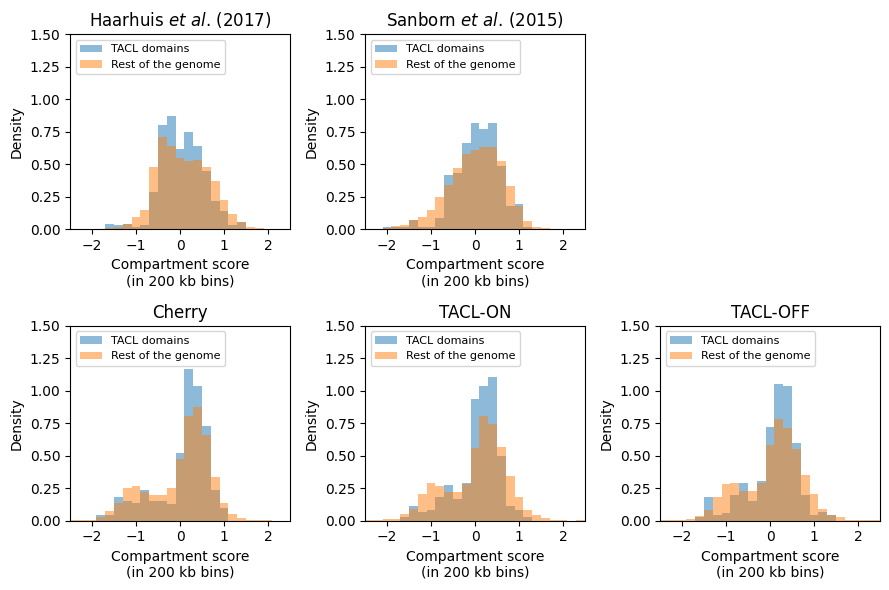

In [228]:
plt.figure(figsize = (9, 6))

plt.subplot(231)
plt.title('Haarhuis $et$ $al$. (2017)')
plt.hist(annotation_tacl_domains['haarhuis_2017.WT'], density = True, range = (-2.5, 2.5), bins = 25, alpha = 0.5, label = 'TACL domains')
plt.hist(annotation_others['haarhuis_2017.WT'], density = True, range = (-2.5, 2.5), bins = 25, alpha = 0.5, label = 'Rest of the genome')
plt.xlabel('Compartment score\n(in 200 kb bins)', fontsize = 10)
plt.ylabel('Density', fontsize = 10)
plt.legend(loc = 'upper left', fontsize = 8)
plt.xlim((-2.5, 2.5))
plt.ylim((0, 1.5))

plt.subplot(232)
plt.title('Sanborn $et$ $al$. (2015)')
plt.hist(annotation_tacl_domains['sanborn_2015.WT'], density = True, range = (-2.5, 2.5), bins = 25, alpha = 0.5, label = 'TACL domains')
plt.hist(annotation_others['sanborn_2015.WT'], density = True, range = (-2.5, 2.5), bins = 25, alpha = 0.5, label = 'Rest of the genome')
plt.xlabel('Compartment score\n(in 200 kb bins)', fontsize = 10)
plt.ylabel('Density', fontsize = 10)
plt.legend(loc = 'upper left', fontsize = 8)
plt.xlim((-2.5, 2.5))
plt.ylim((0, 1.5))

plt.subplot(234)
plt.title('Cherry')
plt.hist(annotation_tacl_domains['T-mCherry'], density = True, range = (-2.5, 2.5), bins = 25, alpha = 0.5, label = 'TACL domains')
plt.hist(annotation_others['T-mCherry'], density = True, range = (-2.5, 2.5), bins = 25, alpha = 0.5, label = 'Rest of the genome')
plt.xlabel('Compartment score\n(in 200 kb bins)', fontsize = 10)
plt.ylabel('Density', fontsize = 10)
plt.legend(loc = 'upper left', fontsize = 8)
plt.xlim((-2.5, 2.5))
plt.ylim((0, 1.5))

plt.subplot(235)
plt.title('TACL-ON')
plt.hist(annotation_tacl_domains['T-MAU2'], density = True, range = (-2.5, 2.5), bins = 25, alpha = 0.5, label = 'TACL domains')
plt.hist(annotation_others['T-MAU2'], density = True, range = (-2.5, 2.5), bins = 25, alpha = 0.5, label = 'Rest of the genome')
plt.xlabel('Compartment score\n(in 200 kb bins)', fontsize = 10)
plt.ylabel('Density', fontsize = 10)
plt.legend(loc = 'upper left', fontsize = 8)
plt.xlim((-2.5, 2.5))
plt.ylim((0, 1.5))

plt.subplot(236)
plt.title('TACL-OFF')
plt.hist(annotation_tacl_domains['T-MAU2_Dox_1H'], density = True, range = (-2.5, 2.5), bins = 25, alpha = 0.5, label = 'TACL domains')
plt.hist(annotation_others['T-MAU2_Dox_1H'], density = True, range = (-2.5, 2.5), bins = 25, alpha = 0.5, label = 'Rest of the genome')
plt.xlabel('Compartment score\n(in 200 kb bins)', fontsize = 10)
plt.ylabel('Density', fontsize = 10)
plt.legend(loc = 'upper left', fontsize = 8)
plt.xlim((-2.5, 2.5))
plt.ylim((0, 1.5))

plt.tight_layout()
plt.savefig('../figures_revision/compartment_scores.pdf', bbox_inches = 'tight')
plt.show()

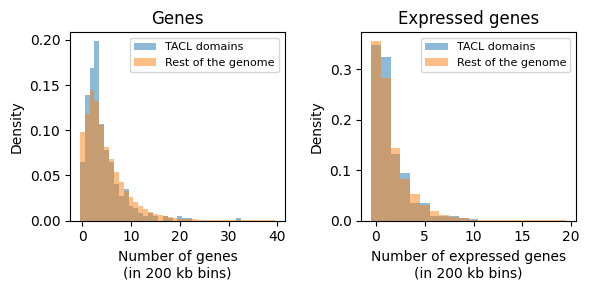

In [229]:
plt.figure(figsize = (6, 3))

plt.subplot(121)
plt.title('Genes')
plt.hist(annotation_tacl_domains['genes'], density = True, range = (0, 40), bins = 40, alpha = 0.5, label = 'TACL domains')
plt.hist(annotation_others['genes'], density = True, range = (0, 40), bins = 40, alpha = 0.5, label = 'Rest of the genome')
plt.xlabel('Number of genes\n(in 200 kb bins)', fontsize = 10)
plt.ylabel('Density', fontsize = 10)
plt.xticks(np.array([0, 10, 20, 30, 40])+0.5, [0, 10, 20, 30, 40])
plt.legend(loc = 'upper right', fontsize = 8)

plt.subplot(122)
plt.title('Expressed genes')
plt.hist(annotation_tacl_domains['expressed_genes'], density = True, range = (0, 20), bins = 20, alpha = 0.5, label = 'TACL domains')
plt.hist(annotation_others['expressed_genes'], density = True, range = (0, 20), bins = 20, alpha = 0.5, label = 'Rest of the genome')
plt.xlabel('Number of expressed genes\n(in 200 kb bins)', fontsize = 10)
plt.ylabel('Density', fontsize = 10)
plt.xticks(np.array([0, 5, 10, 15, 20])+0.5, [0, 5, 10, 15, 20])
plt.legend(loc = 'upper right', fontsize = 8)

plt.tight_layout()
plt.savefig('../figures_revision/gene_density.pdf', bbox_inches = 'tight')
plt.show()

In [144]:


chromhmm = pd.read_csv('../chipseq/haarhuis_2022.chromhmm_hap1_WT.hg19_lift_to_hg38.bed', sep = '\t', header = None)
chromhmm.columns = ['chrom', 'start', 'end', 'state']
chromhmm = chromhmm[chromhmm['chrom'].isin(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 
                                            'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 
                                            'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX'])]

chromhmm_names = {'E1': 'TssA', 'E2': 'TssAFlnk', 'E3': 'TxFlnk', 'E4': 'Tx', 'E5': 'TxWk', 'E6': 'EnhG', 'E7': 'Enh', 
                  'E8': 'ZNF/Rpts', 'E9': 'Het', 'E10': 'TssBiv', 'E11': 'BivFlnk', 'E12': 'EnhBiv', 'E13': 'ReprPC', 'E14': 'ReprPCWk', 'E15': 'Quies'}

chromhmm['state'] = [chromhmm_names[x] for x in chromhmm['state'].values]
chromhmm['index_chromhmm'] = np.arange(len(chromhmm))
chromhmm

,chrom,start,end,state,index_chromhmm
0,chr10,15860,17461,ReprPCWk,0
1,chr10,17461,21249,ReprPC,1
2,chr10,21249,21659,Het,2
3,chr10,21659,27863,ReprPCWk,3
4,chr10,27863,30662,ReprPC,4
...,...,...,...,...,...
497858,chrX,156016335,156016935,TssA,497646
497859,chrX,156016935,156028335,Quies,497647
497860,chrX,156028335,156030135,ReprPCWk,497648
497861,chrX,156030135,156030335,ReprPC,497649


In [145]:
chromhmm_tacl_domains = bioframe.overlap(tacl_domains, chromhmm, suffixes=('_tacl', ''))
chromhmm_others = chromhmm[~chromhmm['index_chromhmm'].isin(list(chromhmm_tacl_domains['index_chromhmm'].values))]

In [146]:
chromhmm_tacl_domains

,chrom_tacl,start_tacl,end_tacl,teto_id_tacl,chrom,start,end,state,index_chromhmm
0,chr3,32710370,34267172,1,chr3,32708308,32712708,Tx,291384
1,chr3,32710370,34267172,1,chr3,32712708,32714308,EnhG,291385
2,chr3,32710370,34267172,1,chr3,32714308,32720308,Tx,291386
3,chr3,32710370,34267172,1,chr3,32720308,32721908,TxWk,291387
4,chr3,32710370,34267172,1,chr3,32721908,32724508,Tx,291388
...,...,...,...,...,...,...,...,...,...
11739,chr5,32608348,35961615,27,chr5,35952298,35957098,ReprPC,354392
11740,chr5,32608348,35961615,27,chr5,35957098,35958298,ReprPCWk,354393
11741,chr5,32608348,35961615,27,chr5,35958298,35959298,ReprPC,354394
11742,chr5,32608348,35961615,27,chr5,35959298,35959898,ReprPCWk,354395


In [201]:
chromhmm_fractions = []
for state in ['TssA', 'TssAFlnk', 'TxFlnk', 'Tx', 'TxWk', 'EnhG', 'Enh', 'ZNF/Rpts', 'Het', 'TssBiv', 'BivFlnk', 'EnhBiv', 'ReprPC', 'ReprPCWk', 'Quies']:
    state_vals_tacl = chromhmm_tacl_domains[chromhmm_tacl_domains['state'] == state]
    state_vals_other = chromhmm_others[chromhmm_others['state'] == state]
    chromhmm_fractions.append([state, np.sum(state_vals_tacl['end']-state_vals_tacl['start']), np.sum(state_vals_other['end']-state_vals_other['start'])])

chromhmm_fractions = pd.DataFrame(chromhmm_fractions)
chromhmm_fractions[1] = chromhmm_fractions[1]/np.sum(chromhmm_fractions[1])*100
chromhmm_fractions[2] = chromhmm_fractions[2]/np.sum(chromhmm_fractions[2])*100
chromhmm_fractions.columns = ['state', 'tacl_domains', 'other']
chromhmm_fractions

,state,tacl_domains,other
0,TssA,0.135376,0.202511
1,TssAFlnk,0.200908,0.263551
2,TxFlnk,0.778631,1.028984
3,Tx,4.244566,5.779945
4,TxWk,10.087261,10.769083
5,EnhG,1.916243,1.854165
6,Enh,4.971827,4.444623
7,ZNF/Rpts,0.134514,0.384504
8,Het,2.236732,3.193323
9,TssBiv,0.008048,0.012301


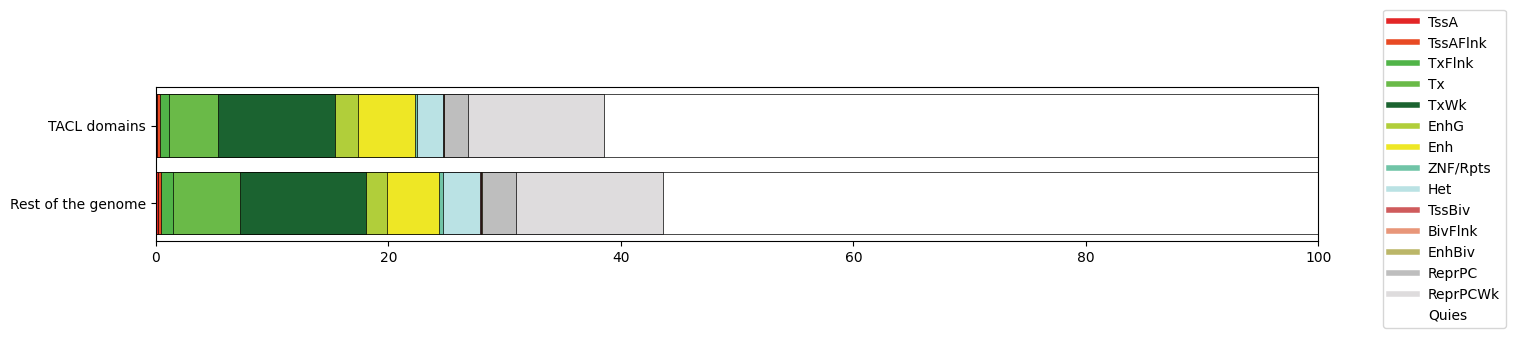

In [230]:
from matplotlib.lines import Line2D

plt.figure(figsize = (15, 2))

fractions_to_plot = [np.sum(chromhmm_fractions['tacl_domains'][:x+1]) for x in range(15)][::-1]
plt.barh([1]*len(fractions_to_plot), fractions_to_plot, color = ['#e32627', '#e84a24', '#51b448', '#6aba48', '#1b6330', '#b1ce3a', '#eee725', '#70c4a7', 
                                                                 '#bae2e4', '#cf5b5c', '#e89679', '#bbb668', '#bebebe', '#dedcdd', '#ffffff'][::-1], edgecolor = 'k', lw = 0.5)
fractions_to_plot = [np.sum(chromhmm_fractions['other'][:x+1]) for x in range(15)][::-1]
plt.barh([0]*len(fractions_to_plot), fractions_to_plot, color = ['#e32627', '#e84a24', '#51b448', '#6aba48', '#1b6330', '#b1ce3a', '#eee725', '#70c4a7', 
                                                                 '#bae2e4', '#cf5b5c', '#e89679', '#bbb668', '#bebebe', '#dedcdd', '#ffffff'][::-1], edgecolor = 'k', lw = 0.5)
plt.yticks([0, 1], ['Rest of the genome', 'TACL domains'])
custom_lines = [Line2D([0], [0], color='#e32627', lw=4),
                Line2D([0], [0], color='#e84a24', lw=4),
                Line2D([0], [0], color='#51b448', lw=4),
                Line2D([0], [0], color='#6aba48', lw=4),
                Line2D([0], [0], color='#1b6330', lw=4),
                Line2D([0], [0], color='#b1ce3a', lw=4),
                Line2D([0], [0], color='#eee725', lw=4),
                Line2D([0], [0], color='#70c4a7', lw=4),
                Line2D([0], [0], color='#bae2e4', lw=4),
                Line2D([0], [0], color='#cf5b5c', lw=4),
                Line2D([0], [0], color='#e89679', lw=4),
                Line2D([0], [0], color='#bbb668', lw=4),
                Line2D([0], [0], color='#bebebe', lw=4),
                Line2D([0], [0], color='#dedcdd', lw=4),
                Line2D([0], [0], color='#ffffff', lw=4)]
plt.legend(custom_lines, ['TssA', 'TssAFlnk', 'TxFlnk', 'Tx', 'TxWk', 'EnhG', 'Enh', 'ZNF/Rpts', 'Het', 'TssBiv', 'BivFlnk', 'EnhBiv', 'ReprPC', 'ReprPCWk', 'Quies'], 
           bbox_to_anchor = (1.05, 1.55))

plt.xlim((0, 100))
plt.savefig('../figures_revision/chromhmm_states.pdf', bbox_inches = 'tight')
plt.show()